In [108]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [109]:
np.random.seed(0)

In [110]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [111]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [112]:
assert(x_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the labels"
assert(x_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the labels"
assert(x_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(x_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

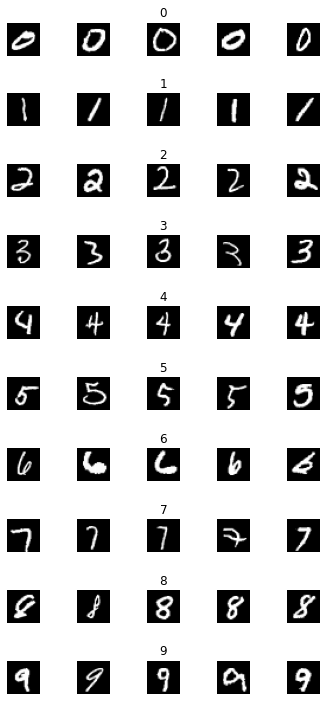

In [113]:
num_of_samples = []
cols = 5
num_classes = 10
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 10))
fig.tight_layout()
for i in range(cols):
  for j in range(num_classes):
    x_selected = x_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0,len(x_selected-1)), :, :], cmap = plt.get_cmap("gray"))
    axs[j][i].axis("off")
    if i == 2:
      axs[j][i].set_title(str(j))
      num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

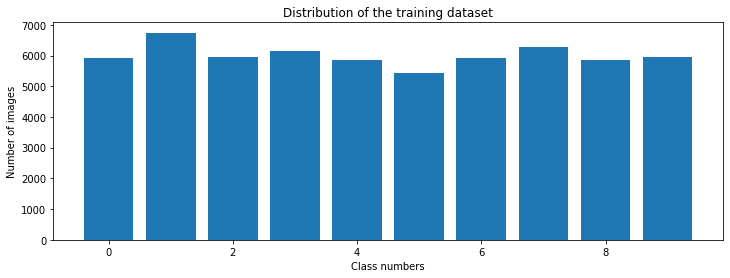

In [114]:
print(num_of_samples)
plt.figure(figsize = (12,4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title('Distribution of the training dataset')
plt.xlabel("Class numbers")
plt.ylabel("Number of images")

In [115]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [116]:
# Normalizing the data
x_train = x_train/255
x_test = x_test/255

In [117]:
num_pixels = 784
x_train = x_train.reshape(x_train.shape[0], num_pixels)
x_test = x_test.reshape(x_test.shape[0], num_pixels)

In [118]:
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim = num_pixels, activation = 'relu'))
  model.add(Dense(10, activation = 'relu'))
  model.add(Dense(num_classes, activation = 'softmax'))
  model.compile(Adam(lr = 0.01), loss = 'categorical_crossentropy', metrics=['accuracy'])
  return model

In [119]:
model = create_model()
h = model.fit(x_train, y_train, validation_split = 0.1, epochs = 10, batch_size = 200,verbose = 1,
          shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.5675 - accuracy: 0.8270 - val_loss: 0.2743 - val_accuracy: 0.9230
Epoch 2/10
270/270 [==============================] - 1s 2ms/step - loss: 0.3045 - accuracy: 0.9113 - val_loss: 0.2749 - val_accuracy: 0.9157
Epoch 3/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2614 - accuracy: 0.9232 - val_loss: 0.2208 - val_accuracy: 0.9300
Epoch 4/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2433 - accuracy: 0.9296 - val_loss: 0.2116 - val_accuracy: 0.9393
Epoch 5/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2317 - accuracy: 0.9312 - val_loss: 0.1971 - val_accuracy: 0.9410
Epoch 6/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2210 - accuracy: 0.9344 - val_loss: 0.1859 - val_accuracy: 0.9430
Epoch 7/10
270/270 [==============================] - 1s 2ms/step - loss: 0.2158 - accuracy: 0.9352 - val_loss: 0.1893 - val_accuracy: 0.9438
Epoch 

Text(0.5, 0, 'epochs')

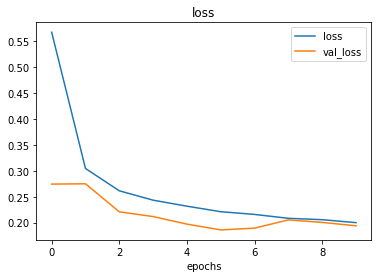

In [120]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

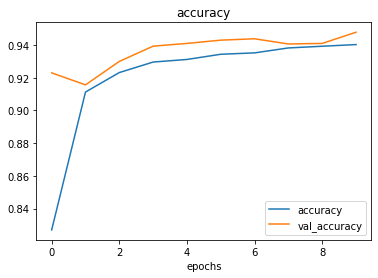

In [121]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

In [122]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.23586232960224152
Test accuracy: 0.9366999864578247


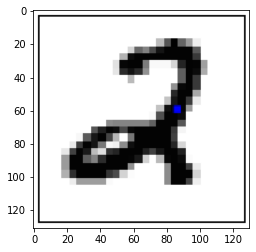

In [124]:
import requests
from PIL import Image

url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream = True)
# if response == 200 means its received successfuly
img = Image.open(response.raw)
plt.imshow(img)

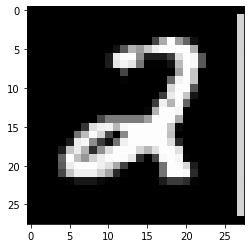

In [128]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image, cmap = plt.get_cmap('gray'))

In [129]:
image = image/255
image = image.reshape(1, 784)

In [131]:
prediction = model.predict_classes(image)
print("predicted digit", prediction)

predicted digit [2]
